In [1]:
from glob import glob

In [2]:
uninfected_path = 'CV/Train/Uninfected/'
infected_path = 'CV/Train/Parasitized/'
negative_images = glob(uninfected_path + '*.png')
positive_images = glob(infected_path + '*.png')
print(len(negative_images))
print(len(positive_images))

10000
10000


In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


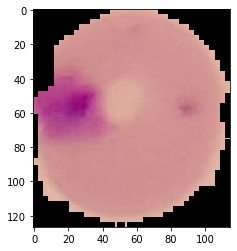

In [4]:
plt.imshow(image.load_img(np.random.choice(positive_images)))
plt.show()

In [5]:
import pandas as pd
df=pd.DataFrame({
    'image_name': positive_images+negative_images,
    'label': ['1'] * len(negative_images) + ['0'] * len(positive_images)
}).sample(frac=1, random_state=42).reset_index(drop=True)

df.head()

,image_name,label
0,CV/Train/Uninfected/C134P95ThinF_IMG_20151005_...,0
1,CV/Train/Parasitized/C132P93ThinF_IMG_20151004...,1
2,CV/Train/Parasitized/C80P41ThinF_IMG_20150817_...,1
3,CV/Train/Parasitized/C129P90ThinF_IMG_20151004...,1
4,CV/Train/Uninfected/C204ThinF_IMG_20151029_112...,0


In [6]:
batch_size = 100

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 445568)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 891138    
Total params: 892,034
Trainable params: 892,034
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
#   preprocessing_function=preprocess_input
)

In [29]:
train_path='CV/Train'
test_path='CV/test'

In [30]:
epochs = 3
batch_size = 32
train_generator = gen.flow_from_directory(
  train_path,
  target_size=[120,120],
  shuffle=False,
  batch_size=batch_size,
)

Found 20000 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  train_generator,
  epochs=2,
  steps_per_epoch=len(df['image_name'].values) // batch_size,
)

Epoch 1/2
 29/625 [>.............................] - ETA: 12:04 - loss: 2027.2063 - accuracy: 0.5690

In [ ]:
test_images=glob(test_path+'/*.png')


In [71]:
import cv2
predictions=[]
for i in range(0,len(test_images)):
    x=cv2.imread(test_images[i])
    x=cv2.resize(x,(120,120))
    x=np.expand_dims(x,axis=0)
    pred=final_model.predict(x)
    predictions.append(pred)    

In [ ]:
predictions

1

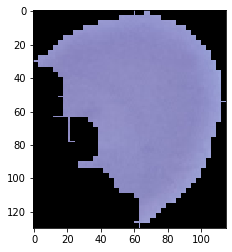

In [79]:
x=cv2.imread(test_images[19])
plt.imshow(x)
np.argmax(predictions[19])